https://www.coursera.org/learn/classification-vector-spaces-in-nlp/lecture/dDdRc/welcome-to-the-nlp-specialization

Course on NLP on coursera

Kind of sentiment analysis and introduction to representation of text as vectors.

"Learn to extract features from text into numerical vectors, then build a binary classifier for tweets using a logistic regression!"

[data-set] = http://www.nltk.org/howto/twitter.html#corpus_reader


In [52]:
import nltk
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\Vojta\AppData\Roaming\nltk_data...


PermissionError: [WinError 32] Proces nemá přístup k souboru, neboť jej právě využívá jiný proces: 'C:\\Users\\Vojta\\AppData\\Roaming\\nltk_data\\corpora\\twitter_samples.zip'

In [14]:
import numpy as np
import pandas as pd
from nltk.corpus import twitter_samples
import os

In [15]:
twitter_samples.fileids()

['negative_tweets.json', 'positive_tweets.json', 'tweets.20150430-223406.json']

In [16]:
print(os.getcwd())

C:\Users\Vojta\Desktop\own\university\ing\projects\seminar\analysis\jupyters\Week 1\LogisticRegression


In [17]:
path_to_dataset = '.\\DataSets\\'

In [18]:
name_of_negative = 'negative_tweets.json'
negative_tweets = pd.read_json(f'{path_to_dataset}{name_of_negative}', lines=True)

In [19]:
name_of_positive = 'positive_tweets.json' 
positive_tweets = pd.read_json(f'{path_to_dataset}{name_of_positive}', lines=True)

In [20]:
negative_tweets.head()

,contributors,coordinates,text,user,retweet_count,favorited,entities,source,truncated,geo,...,in_reply_to_user_id,created_at,metadata,favorite_count,id_str,id,quoted_status,quoted_status_id,possibly_sensitive,quoted_status_id_str
0,NaN,None,hopeless for tmr :(,"{'screen_name': 'yuwraxkim', 'time_zone': 'Jak...",0,False,"{'hashtags': [], 'user_mentions': [], 'urls': ...","<a href=""https://mobile.twitter.com"" rel=""nofo...",False,None,...,NaN,2015-07-24 10:42:49+00:00,"{'iso_language_code': 'en', 'result_type': 're...",0,624530164626534400,624530164626534400,NaN,NaN,NaN,NaN
1,NaN,None,Everything in the kids section of IKEA is so c...,"{'screen_name': 'EveHollyHousley', 'time_zone'...",0,False,"{'hashtags': [], 'user_mentions': [], 'urls': ...","<a href=""http://twitter.com/download/iphone"" r...",False,None,...,NaN,2015-07-24 10:42:48+00:00,"{'iso_language_code': 'en', 'result_type': 're...",0,624530162890219520,624530162890219521,NaN,NaN,NaN,NaN
2,NaN,None,@Hegelbon That heart sliding into the waste ba...,"{'screen_name': 'prostgrad', 'time_zone': 'Ath...",0,False,"{'hashtags': [], 'user_mentions': [{'id_str': ...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",False,None,...,1.633281e+09,2015-07-24 10:42:48+00:00,"{'iso_language_code': 'en', 'result_type': 're...",1,624530162600812544,624530162600812544,NaN,NaN,NaN,NaN
3,NaN,None,"“@ketchBurning: I hate Japanese call him ""bani...","{'screen_name': 'burningyoppy', 'time_zone': '...",0,False,"{'hashtags': [], 'user_mentions': [{'id_str': ...","<a href=""http://twitter.com/download/iphone"" r...",False,None,...,2.185486e+08,2015-07-24 10:42:48+00:00,"{'iso_language_code': 'en', 'result_type': 're...",0,624530161011048448,624530161011048448,NaN,NaN,NaN,NaN
4,NaN,None,"Dang starting next week I have ""work"" :(","{'screen_name': '3angiefalangie', 'time_zone':...",0,False,"{'hashtags': [], 'user_mentions': [], 'urls': ...","<a href=""http://twitter.com/download/iphone"" r...",False,None,...,NaN,2015-07-24 10:42:47+00:00,"{'iso_language_code': 'en', 'result_type': 're...",0,624530159928934400,624530159928934400,NaN,NaN,NaN,NaN


In [21]:
positive_tweets.head()

,contributors,coordinates,text,user,retweet_count,favorited,entities,source,truncated,geo,...,in_reply_to_user_id,created_at,metadata,favorite_count,id_str,id,possibly_sensitive,quoted_status_id,quoted_status,quoted_status_id_str
0,NaN,None,#FollowFriday @France_Inte @PKuchly57 @Milipol...,"{'time_zone': 'Paris', 'profile_background_ima...",0,False,"{'hashtags': [{'indices': [0, 13], 'text': 'Fo...","<a href=""https://commun.it"" rel=""nofollow"">Com...",False,None,...,NaN,2015-07-24 08:23:36+00:00,"{'iso_language_code': 'en', 'result_type': 're...",0,624495129303351296,624495129303351296,NaN,NaN,NaN,NaN
1,NaN,None,@Lamb2ja Hey James! How odd :/ Please call our...,"{'time_zone': 'London', 'profile_background_im...",0,False,"{'hashtags': [], 'user_mentions': [{'screen_na...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",False,None,...,19458835.0,2015-07-24 08:23:35+00:00,"{'iso_language_code': 'en', 'result_type': 're...",0,624495128510656512,624495128510656513,NaN,NaN,NaN,NaN
2,NaN,None,@DespiteOfficial we had a listen last night :)...,"{'time_zone': 'Casablanca', 'profile_backgroun...",0,False,"{'hashtags': [], 'user_mentions': [{'screen_na...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",False,None,...,275918243.0,2015-07-24 08:23:35+00:00,"{'iso_language_code': 'en', 'result_type': 're...",0,624495126535106560,624495126535106560,NaN,NaN,NaN,NaN
3,NaN,None,@97sides CONGRATS :),"{'time_zone': 'Paris', 'profile_background_ima...",0,False,"{'hashtags': [], 'user_mentions': [{'screen_na...","<a href=""http://twitter.com/download/iphone"" r...",False,None,...,774644509.0,2015-07-24 08:23:35+00:00,"{'iso_language_code': 'en', 'result_type': 're...",0,624495126170238976,624495126170238976,NaN,NaN,NaN,NaN
4,NaN,None,yeaaaah yippppy!!! my accnt verified rqst has...,"{'time_zone': None, 'profile_background_image_...",0,False,"{'hashtags': [], 'user_mentions': [], 'urls': ...","<a href=""https://mobile.twitter.com"" rel=""nofo...",False,None,...,NaN,2015-07-24 08:23:34+00:00,"{'iso_language_code': 'en', 'result_type': 're...",0,624495124148391936,624495124148391936,NaN,NaN,NaN,NaN


In [22]:
size_of_positive = positive_tweets.shape
size_of_negative = negative_tweets.shape


In [23]:
import matplotlib.pyplot as plt

([<matplotlib.axis.XTick at 0x200e4c17e50>,
 [Text(0, 0, 'size_of_positive'), Text(1, 0, 'size_of_negative')])

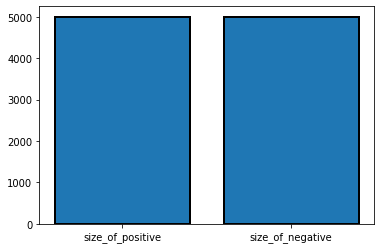

In [24]:
values = np.arange(2)
plt.bar(values, height=[size_of_positive[0], size_of_negative[0]], align='center', linewidth=2, edgecolor='k')
plt.xticks(values, ['size_of_positive', 'size_of_negative'])

In [62]:
positive = positive_tweets[['text']].copy()
negative = negative_tweets[['text']].copy()


positive.head()

,text
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...
1,@Lamb2ja Hey James! How odd :/ Please call our...
2,@DespiteOfficial we had a listen last night :)...
3,@97sides CONGRATS :)
4,yeaaaah yippppy!!! my accnt verified rqst has...


In [63]:
positive.loc[:, 'sentiment'] = 1
negative.loc[:, 'sentiment'] = 0

Tweet preprocessing.

Build vocabulary.

In [133]:
def build_vocabulary(text):
    vocabulary = {}
    for value in text.split(' '):
        if value in vocabulary:
            vocabulary[value] += 1
        else:
            vocabulary[value] = 0
            
    return vocabulary


In [137]:
joined_pos = " ".join(positive.text.values)
pos_vocabulary = build_vocabulary(joined_pos)

pos_sorted_by_occurences = {k: v for k, v in sorted(pos_vocabulary.items(), key=lambda item: item[1], reverse=True)}
print(len(sorted_by_occurences))

14539


In [151]:
joined_neg = " ".join(negative.text.values)
neg_vocabulary = build_vocabulary(joined_neg)


neg_sorted_by_occurences = {k: v for k, v in sorted(neg_vocabulary.items(), key=lambda item: item[1], reverse=True)}
print(len(sorted_by_occurences))

14539


([<matplotlib.axis.XTick at 0x200e27b5580>,
 [Text(0, 0, 'pos_term_size'), Text(1, 0, 'neg_term_size')])

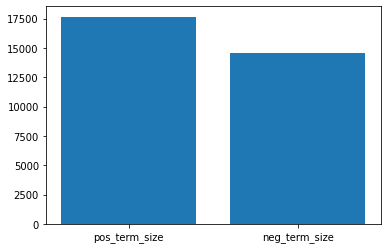

In [152]:
lengths = (len(pos_sorted_by_occurences), len(neg_sorted_by_occurences))
plt.bar(np.arange(len(lengths)), height=lengths)
plt.xticks(np.arange(len(lengths)), ['pos_term_size', 'neg_term_size'])

In [162]:
def plot_occurences_of_terms(sorted_dict, n):
    keys = list(sorted_dict.keys())[:n]
    values = list(sorted_dict.values())[:n]
    
    ids = np.arange(len(keys))
    plt.bar(ids, height=values, width=0.2)
    plt.xticks(ids, keys)
        




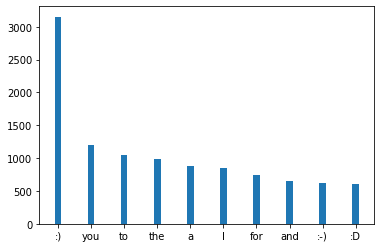

In [161]:
plot_occurences_of_terms(pos_sorted_by_occurences, 10)

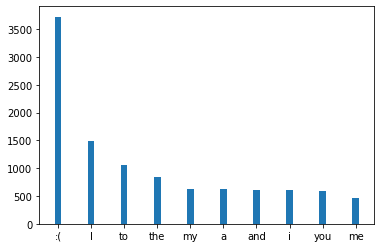

In [163]:
plot_occurences_of_terms(neg_sorted_by_occurences, 10)

Representation as TF = term frequency. In this approach we are going to learn len(V) parameters, which is quite unefficient. Every tweet will be represented as vector with few values >= 1 and a lot 0. ..Sparse matrix.

In [ ]:
Representation as sum of positive vs negative. Kind of approach where we are going to reduce 
dimension of V to dimension of 3. [bia, freq(pos), freq(neg)]. Our vocabulary has key as word and
dimension of 2. Where every key (word) has discrete number value describing occurences in positive
tweet and opossite negative tweet.